In [1]:
import numpy as np
import scipy.stats
with open('input.txt') as f:
    data = np.array([int(x) for x in f.read().split(',')])
print(data.size)

1000


In [2]:
print(np.median(data))
print(np.sum(np.abs(data-np.median(data))))

298.0
356958.0


In [3]:
avg = int(np.mean(data))# not sure why this works tbh, for the sample it should round up, while the input must floor
print(avg)
dist = np.abs(avg - data)
print(np.sum(dist*(dist+1)/2.))

464
105461913.0


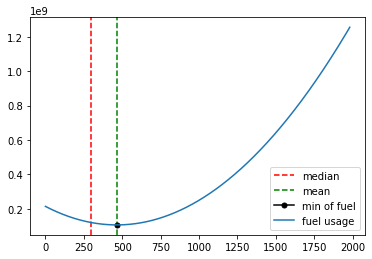

298.0 464.542 464
105461829.532
105461913.0


In [22]:
from matplotlib import pyplot as plt
tstspace = np.arange(np.min(data), np.max(data)+1, 1)
dist = np.zeros((tstspace.size, data.size))
fuel = np.zeros(tstspace.size)

for i in range(dist.shape[0]):
    dist[i, :] = np.abs(data - tstspace[i])
    fuel[i] = np.sum(dist[i, :] * (dist[i, :]+1)/2)

med = np.median(data)   
avg = np.mean(data)

best = np.argmin(fuel)

plt.axvline(x=med, linestyle='--', color='red', label='median')
plt.axvline(x=avg, linestyle='--', color='green', label='mean')
plt.plot(best, fuel[best], color='black', marker='o', markersize=5, label='min of fuel')
plt.plot(tstspace, fuel, label='fuel usage')
plt.legend()
plt.show()
print(med, avg, best)
distavg = np.abs(data - avg)
fuelavg = np.sum(distavg * (distavg + 1)/2)
print(fuelavg)
print(fuel[best])

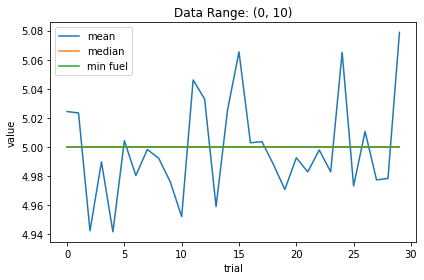

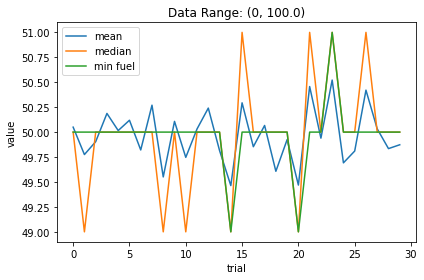

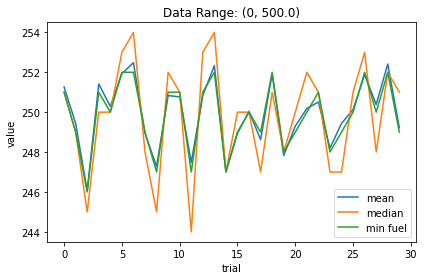

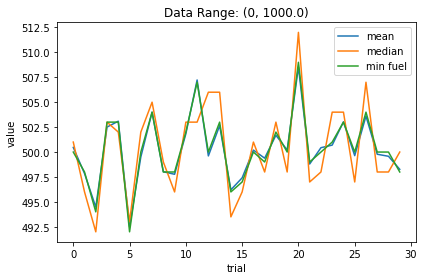

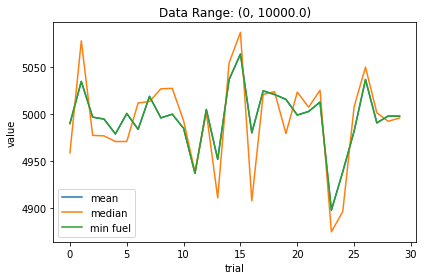

In [39]:
T = int(1e1*3)
means = np.zeros(T)
meds = means.copy()
bests = means.copy()
for maxval in [10, 1e2, 5e2, 1e3, 1e4]:
    datarange = np.arange(0, int(maxval)+1, 1)
    N = int(1e4)
    tstspace = datarange
    for t in range(T):

        rdata = np.random.randint(low=datarange[0], high=datarange[-1]+1,size=(N))
        dist = np.zeros((tstspace.size, rdata.size))
        fuel = np.zeros(tstspace.size)

        for i in range(dist.shape[0]):
            dist[i, :] = np.abs(rdata - tstspace[i])
            fuel[i] = np.sum(dist[i, :] * (dist[i, :]+1)/2)

        meds[t] = np.median(rdata)   
        means[t] = np.mean(rdata)

        bests[t] = np.argmin(fuel)

    plt.plot(means, label='mean')
    plt.plot(meds, label='median')
    plt.plot(bests, label='min fuel')
    plt.title(f"Data Range: ({0}, {maxval})")
    plt.xlabel('trial')
    plt.ylabel('value')
    plt.legend()
    plt.tight_layout()
    plt.show()